In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/amans/Downloads/data_clean.csv")
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [2]:
data.rename({'Solar.R': 'Solar'},axis = 1,inplace= True)
data.head()

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [3]:
data.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar          7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

<Axes: >

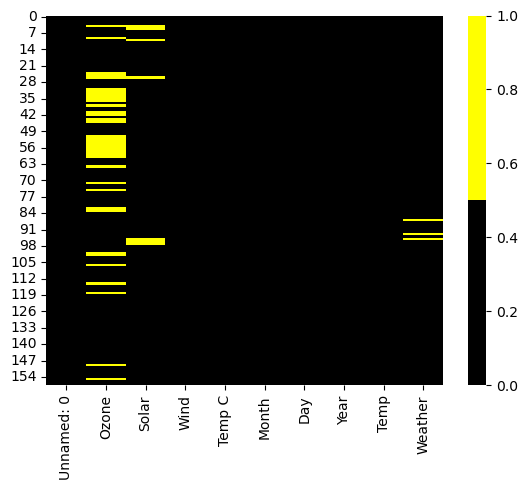

In [4]:
cols = data.columns
colors = ['black' , 'yellow']
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [5]:
median_ozone = data["Ozone"].median()
mean_ozone =data["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [6]:
data['Ozone'] = data['Ozone'].fillna(median_ozone)
data.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         7
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       3
dtype: int64

In [7]:
data['Solar'] = data['Solar'].fillna(median_ozone)
data.head()

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,30.5,30.5,14.3,56,5,5,2010,56,S


In [8]:
data.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         0
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       3
dtype: int64

In [9]:
print(data['Weather'].value_counts())
mode_weather = data['Weather'].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [10]:
data["Weather"] =data["Weather"].fillna(mode_weather)
data.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         0
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       0
dtype: int64

In [11]:
data.reset_index(drop = True)

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,30.5,30.5,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,30.5,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [12]:
data.drop(["Unnamed: 0"],axis = 1)

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,30.5,30.5,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,30.5,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


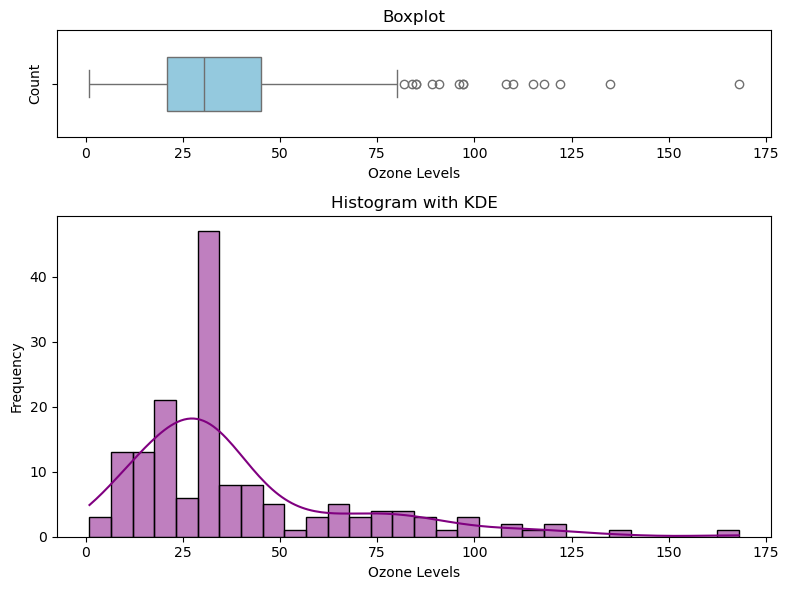

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=data["Ozone"], ax =axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
axes[0].set_ylabel("Count")

sns.histplot(data["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

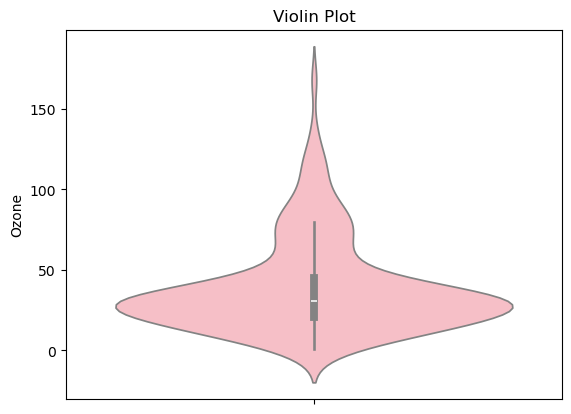

In [19]:
sns.violinplot(data=data['Ozone'],color='lightpink')
plt.title('Violin Plot')
plt.show()

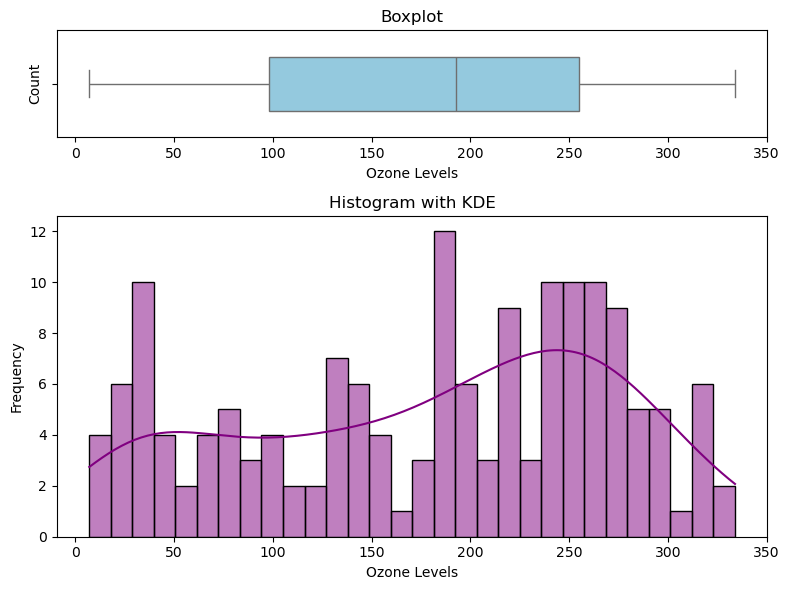

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=data["Solar"], ax =axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
axes[0].set_ylabel("Count")

sns.histplot(data["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()